This section of the project report aims to explore the correlation between StackOverflow question ratings and answer ratings. By examining the relationship between these two metrics, we can gain insights into the dynamics of knowledge-sharing within the programming community and shed light on the factors that contribute to the success of questions on Stack Overflow.

To conduct this analysis, we will leverage a dataset comprising question ratings and corresponding answer ratings. By utilizing statistical methods and data visualization techniques, we will seek to identify patterns and trends that emerge from the correlation between question ratings and Stack Overflow ratings.

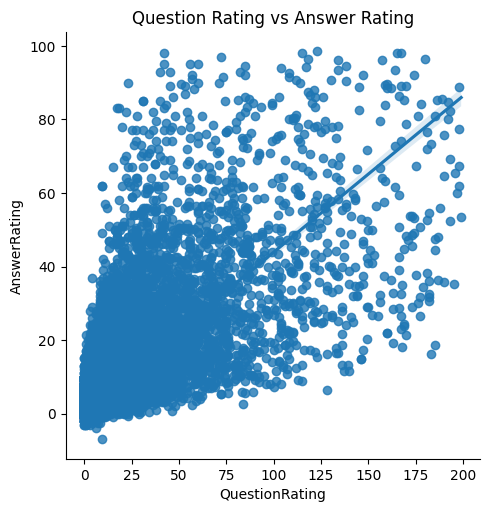

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Do higher rated questions get higher rated answers?
# This is a visualization of the relationship between the average rating of a question and the average rating of its answers, using all three languages
answers = pd.read_csv('Answers_Processed.csv', encoding='latin1')
questions = pd.read_csv('Questions_Processed.csv', encoding='latin1')

# Get the average rating of each question
question_ratings = questions.groupby('Id')['Score'].mean().reset_index()
question_ratings.columns = ['Id', 'QuestionRating']

# Get the average rating of each answer
answer_ratings = answers.groupby('Id')['Score'].mean().reset_index()
answer_ratings.columns = ['Id', 'AnswerRating']

# Merge the two dataframes
merged = pd.merge(question_ratings, answer_ratings, on='Id', how='inner')

# clean the data by removing outliers
merged = merged[merged['QuestionRating'] < 200]
merged = merged[merged['AnswerRating'] < 100]
# merged.head()
# Plot the data
sns.lmplot(x='QuestionRating', y='AnswerRating', data=merged)
plt.title('Question Rating vs Answer Rating')
plt.show()

The graph above clearly indicates a positive correlation between the score of a question, and the mean average of the answer's scores.  The data visualized in the graph has been extensivley trimmed of outliers (Question ratings greater than 200 and Answer ratings greater than 100), so as to get a better understanding of the average trend.

# We now investigate each of the 9 languages individually

In [17]:
# Question Rating vs Answer Rating for each language (python, cpp, java)
python_answers = answers[answers['Tag']=="python"].groupby('Id')['Score'].mean().reset_index()
python_questions = questions[questions['Tag']=="python"].groupby('Id')['Score'].mean().reset_index()

cpp_answers = answers[answers['Tag']=="c++"].groupby('Id')['Score'].mean().reset_index()
cpp_questions = questions[questions['Tag']=="c++"].groupby('Id')['Score'].mean().reset_index()

java_answers = answers[answers['Tag']=="java"].groupby('Id')['Score'].mean().reset_index()
java_questions = questions[questions['Tag']=="java"].groupby('Id')['Score'].mean().reset_index()

javascript_answers = answers[answers['Tag']=="javascript"].groupby('Id')['Score'].mean().reset_index()
javascript_questions = questions[questions['Tag']=="javascript"].groupby('Id')['Score'].mean().reset_index()

c_answers = answers[answers['Tag']=="c"].groupby('Id')['Score'].mean().reset_index()
c_questions = questions[questions['Tag']=="c"].groupby('Id')['Score'].mean().reset_index()

html_answers = answers[answers['Tag']=="html"].groupby('Id')['Score'].mean().reset_index()
html_questions = questions[questions['Tag']=="html"].groupby('Id')['Score'].mean().reset_index()

sql_answers = answers[answers['Tag']=="sql"].groupby('Id')['Score'].mean().reset_index()
sql_questions = questions[questions['Tag']=="sql"].groupby('Id')['Score'].mean().reset_index()

ruby_answers = answers[answers['Tag']=="ruby"].groupby('Id')['Score'].mean().reset_index()
ruby_questions = questions[questions['Tag']=="ruby"].groupby('Id')['Score'].mean().reset_index()

php_answers = answers[answers['Tag']=="php"].groupby('Id')['Score'].mean().reset_index()
php_questions = questions[questions['Tag']=="php"].groupby('Id')['Score'].mean().reset_index()


# # Merge the two dataframes
python_merged = pd.merge(python_questions, python_answers, on='Id', how='inner')
python_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

cpp_merged = pd.merge(cpp_questions, cpp_answers, on='Id', how='inner')
cpp_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

java_merged = pd.merge(java_questions, java_answers, on='Id', how='inner')
java_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

javascript_merged = pd.merge(javascript_questions, javascript_answers, on='Id', how='inner')
javascript_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

c_merged = pd.merge(c_questions, c_answers, on='Id', how='inner')
c_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

html_merged = pd.merge(html_questions, html_answers, on='Id', how='inner')
html_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

sql_merged = pd.merge(sql_questions, sql_answers, on='Id', how='inner')
sql_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

ruby_merged = pd.merge(ruby_questions, ruby_answers, on='Id', how='inner')
ruby_merged.columns = ["Id", "QuestionRating", "AnswerRating"]

php_merged = pd.merge(php_questions, php_answers, on='Id', how='inner')
php_merged.columns = ["Id", "QuestionRating", "AnswerRating"]


python_merged.head()
# remove outliers
python_merged = python_merged[python_merged['QuestionRating'] < 400]
python_merged = python_merged[python_merged['AnswerRating'] < 150]

cpp_merged = cpp_merged[cpp_merged['QuestionRating'] < 400]
cpp_merged = cpp_merged[cpp_merged['AnswerRating'] < 150]

java_merged = java_merged[java_merged['QuestionRating'] < 400]
java_merged = java_merged[java_merged['AnswerRating'] < 150]

javascript_merged = javascript_merged[javascript_merged['QuestionRating'] < 400]
javascript_merged = javascript_merged[javascript_merged['AnswerRating'] < 150]

c_merged = c_merged[c_merged['QuestionRating'] < 400]
c_merged = c_merged[c_merged['AnswerRating'] < 150]

html_merged = html_merged[html_merged['QuestionRating'] < 400]
html_merged = html_merged[html_merged['AnswerRating'] < 150]

sql_merged = sql_merged[sql_merged['QuestionRating'] < 400]
sql_merged = sql_merged[sql_merged['AnswerRating'] < 150]

ruby_merged = ruby_merged[ruby_merged['QuestionRating'] < 400]
ruby_merged = ruby_merged[ruby_merged['AnswerRating'] < 150]

php_merged = php_merged[php_merged['QuestionRating'] < 400]
php_merged = php_merged[php_merged['AnswerRating'] < 150]

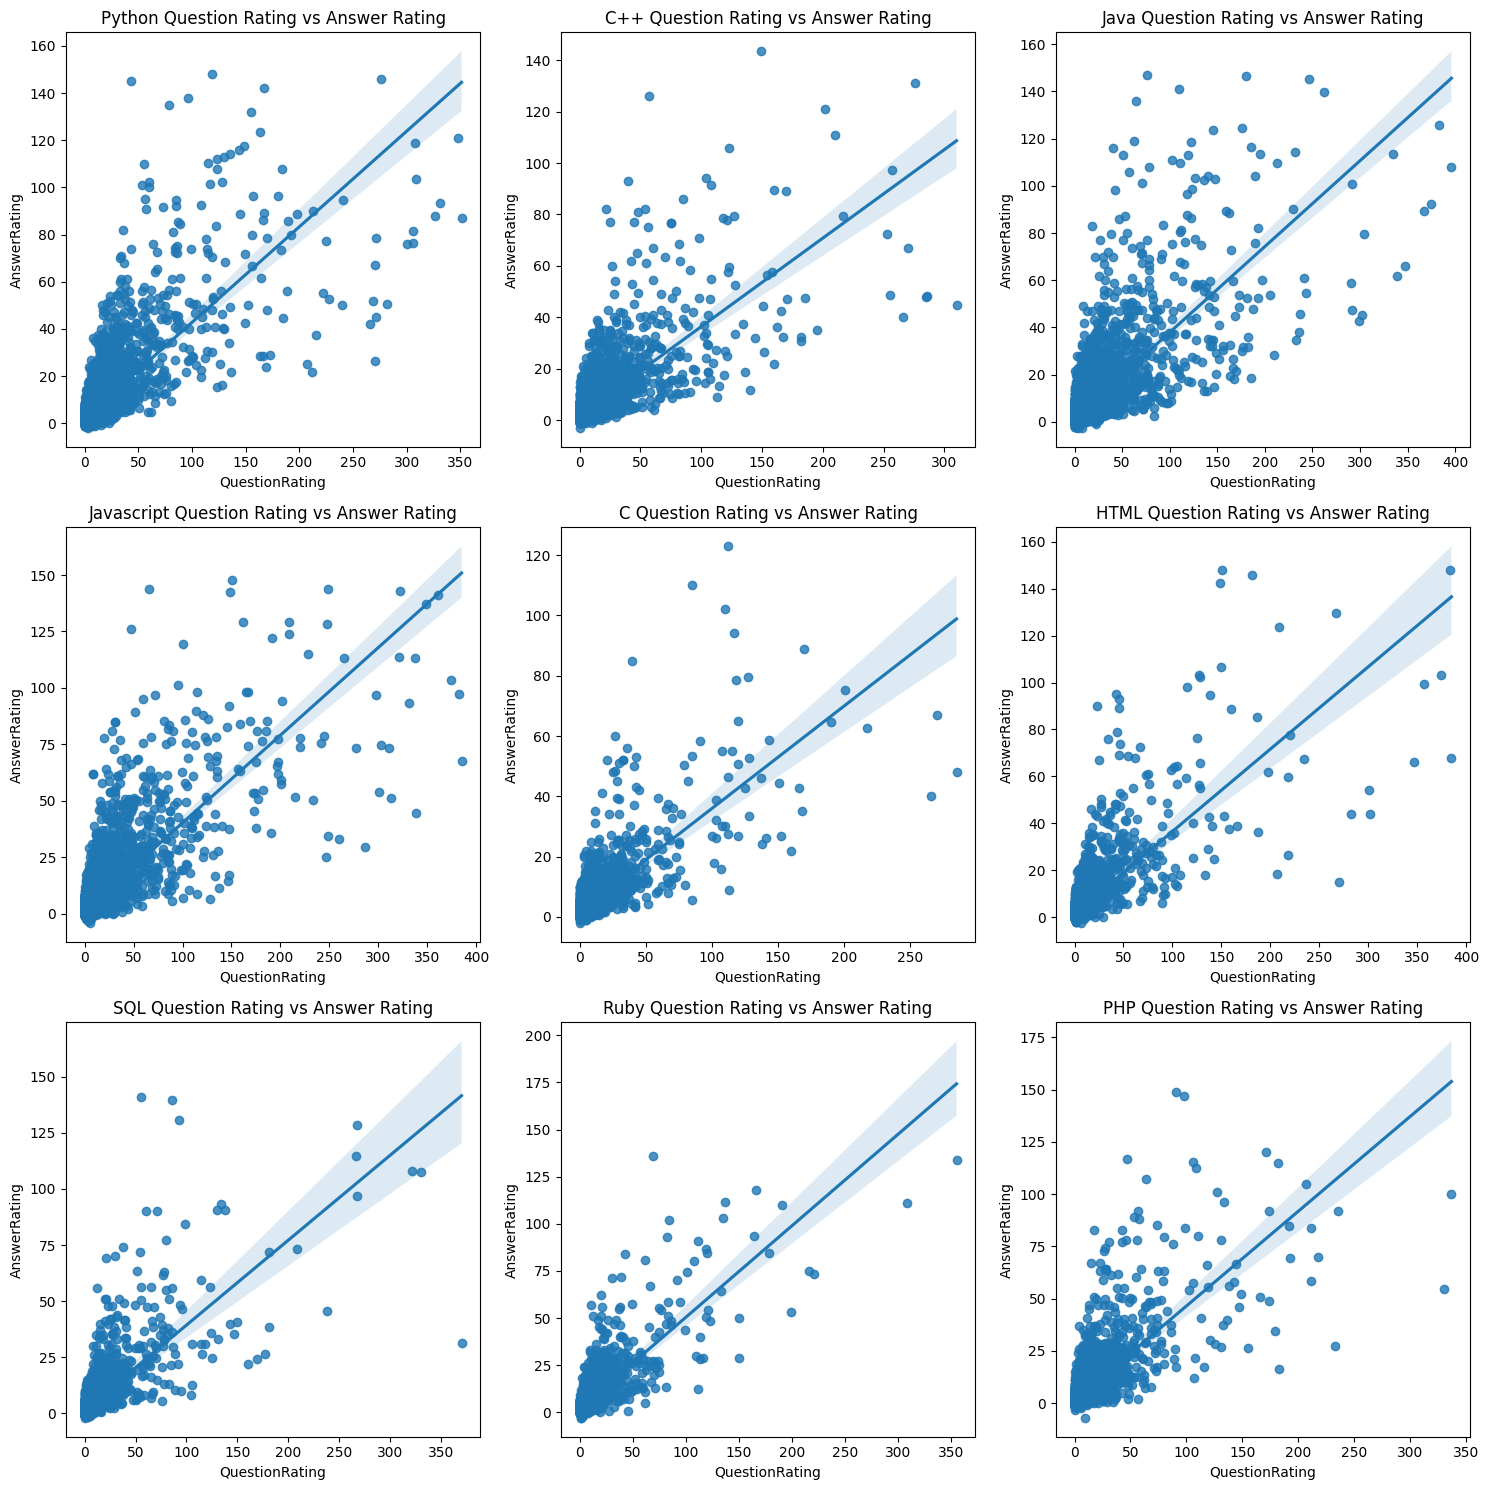

In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Define the datasets and corresponding titles
datasets = [python_merged, cpp_merged, java_merged, javascript_merged, c_merged, html_merged, sql_merged, ruby_merged, php_merged]
titles = ['Python', 'C++', 'Java', 'Javascript', 'C', 'HTML', 'SQL', 'Ruby', 'PHP']

# Iterate over the datasets and titles, and plot each graph in a separate subplot
for i, (data, title) in enumerate(zip(datasets, titles)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.regplot(x='QuestionRating', y='AnswerRating', data=data, ax=ax)
    axes[row, col].set_title(f'{title} Question Rating vs Answer Rating')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


As seen in the graphs above, each of the languages have a similar positive correlation between question rating and answer rating.